In [1]:
import json
import csv
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# review data

In [4]:
data = []
with open('review.json') as f:
    for line in f:
        data.append(json.loads(line))

In [5]:
len(data)

4736897

In [4]:
reviewid = []
businessid= []
userid = []
stars = []
text = []
date = []

for entry in range(0, len(data)):     
    reviewid.append(data[entry]['review_id'])
    businessid.append(data[entry]['business_id'])
    userid.append(data[entry]['user_id'])
    stars.append(data[entry]['stars'])
    text.append(data[entry]['text'])
    date.append(data[entry]['date'])

In [5]:
data = {'review_id':reviewid,'business_id':businessid,'user_id':userid,'stars':stars,'text':text,'date':date}
review_data  = pd.DataFrame(data)

In [6]:
review_data.head()

,business_id,date,review_id,stars,text,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,2016-07-12,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,2016-10-02,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,2015-09-17,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,2016-08-21,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,2013-11-20,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0xtbPEna2Kei11vsU-U2Mw


In [7]:
review_data.to_csv('review_data.csv')

In [2]:
a = pd.read_csv('review_data.csv')  

/Users/zhiweizhang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(a)

4736899

#  load business data

In [3]:
data2 = []
with open('business.json') as f:
    for line in f:
        data2.append(json.loads(line))
len(data2)   

156639

In [5]:
data2

[{'address': '691 Richmond Rd',
  'attributes': {'BikeParking': True,
   'BusinessParking': {'garage': False,
    'lot': True,
    'street': False,
    'valet': False,
    'validated': False},
   'RestaurantsPriceRange2': 2,
   'WheelchairAccessible': True},
  'business_id': 'YDf95gJZaq05wvo7hTQbbQ',
  'categories': ['Shopping', 'Shopping Centers'],
  'city': 'Richmond Heights',
  'hours': {'Friday': '10:00-21:00',
   'Monday': '10:00-21:00',
   'Saturday': '10:00-21:00',
   'Sunday': '11:00-18:00',
   'Thursday': '10:00-21:00',
   'Tuesday': '10:00-21:00',
   'Wednesday': '10:00-21:00'},
  'is_open': 1,
  'latitude': 41.5417162,
  'longitude': -81.4931165,
  'name': 'Richmond Town Square',
  'neighborhood': '',
  'postal_code': '44143',
  'review_count': 17,
  'stars': 2.0,
  'state': 'OH'},
 {'address': '2824 Milton Rd',
  'attributes': {'Ambience': {'casual': False,
    'classy': False,
    'divey': False,
    'hipster': False,
    'intimate': False,
    'romantic': False,
    'tour

In [4]:
business_id = []
city = []
state = []
stars = []
review_count = []
categories = []
postal_code = []
latitude = []
longitude = []
pricerange = []
is_open = []


for entry in range(0, len(data2)):     
    business_id.append(data2[entry]['business_id'])
    city.append(data2[entry]['city'])
    state.append(data2[entry]['state'])
    stars.append(data2[entry]['stars'])
    postal_code.append(data2[entry]['postal_code'])
    review_count.append(data2[entry]['review_count'])
    categories.append(data2[entry]['categories'])
    latitude.append(data2[entry]['latitude'])
    longitude.append(data2[entry]['longitude'])
    is_open.append(data2[entry]['is_open'])
    if 'RestaurantsPriceRange2'in data2[entry]['attributes']:
        pricerange.append(data2[entry]['attributes']['RestaurantsPriceRange2'])
    else:
        pricerange.append(0)
         

In [12]:
data2 = {'business_id ':business_id ,'city':city,'state':state,'stars':stars,'review_count':review_count,
        'categories':categories,'latitude':latitude,'longitude':longitude,'is_open':is_open,
        'pricerange':pricerange,'postal_code':postal_code}
business_data  = pd.DataFrame(data2)
# business_data.to_csv('business_data.csv')

In [6]:
new_business = business_data[business_data['pricerange']!=0]

In [7]:
new_business.groupby(new_business['state']).count()

,business_id,categories,city,is_open,latitude,longitude,postal_code,pricerange,review_count,stars
state,,,,,,,,,,
01,5,5,5,5,5,5,5,5,5,5
3,1,1,1,1,1,1,1,1,1,1
75,1,1,1,1,1,1,1,1,1,1
ABE,2,2,2,2,2,2,2,2,2,2
AL,1,1,1,1,1,1,1,1,1,1
AZ,23722,23722,23722,23722,23722,23722,23722,23722,23722,23722
BW,2191,2191,2191,2191,2191,2191,2191,2191,2191,2191
C,28,28,28,28,28,28,28,28,28,28
CA,2,2,2,2,2,2,2,2,2,2


In [8]:
IL = new_business[new_business['state']=='IL']   # PA NV NC IL OH AZ only keep these 6 states 
PA = new_business[new_business['state']=='PA'] 
NV = new_business[new_business['state']=='NV']
NC = new_business[new_business['state']=='NC']
OH = new_business[new_business['state']=='OH']
AZ = new_business[new_business['state']=='AZ']
frame = [IL,PA,NV,NC,OH,AZ]
business_info = pd.concat(frame)

In [205]:
business_info.to_csv('business_data.csv')

In [203]:
a = plt.hist(business_info[business_info['state'] =='IL']['stars'])

In [206]:
pd.read_csv('business_data.csv')

,Unnamed: 0,business_id,categories,city,is_open,latitude,longitude,postal_code,pricerange,review_count,stars,state
0,82,fl2TPNWrchkCbNEg0utjvw,"['Diners', 'Breakfast & Brunch', 'Burgers', 'A...",Urbana,1,40.133197,-88.198577,61802.0,1,14,2.0,IL
1,259,MqhxKfI7oMjUTMqH2gnhyg,"['Fast Food', 'Restaurants', 'Burgers']",Champaign,1,40.137569,-88.243052,61820.0,1,10,1.5,IL
2,260,h21I071qoAZgFy0eBqNhbg,"['Video Game Stores', 'Videos & Video Game Ren...",Champaign,1,40.116024,-88.242185,61820.0,1,7,3.5,IL
3,406,wBkfvRbzCADkPaLBTqsEqw,"['Sports Wear', 'Outlet Stores', 'Department S...",Tuscola,1,39.787932,-88.268837,61953.0,3,4,5.0,IL
4,410,Q2bnRzJ8AC-3lWyQY8DZqA,"['Restaurants', 'Barbeque']",Urbana,0,40.106863,-88.221864,61803.0,1,8,2.5,IL
5,437,XtJj67rKT16a4tQw7bxtyw,"['Restaurants', 'Thai']",Champaign,0,40.110554,-88.232373,61820.0,1,13,2.5,IL
6,562,Y2ySw4qMHgjd1T_2Zt9Eeg,"['Ice Cream & Frozen Yogurt', 'Food', 'Do-It-Y...",Champaign,1,40.097513,-88.275136,61821.0,1,13,3.5,IL
7,816,yFftpvJrkz4E38wUtps7Yw,"['Shopping', 'Lingerie', 'Fashion']",Champaign,1,40.111537,-88.277709,61821.0,2,4,3.0,IL
8,890,89-bwvH5mWWOOb00VTUyFQ,"['Burgers', 'Sports Bars', 'American (Traditio...",Savoy,1,40.069599,-88.249054,61874.0,2,24,2.5,IL
9,1128,8sCEkyczBsOEqizt3mfXyg,"['Bars', 'Nightlife']",Champaign,1,40.109699,-88.230361,61820.0,2,27,3.0,IL


In [192]:
nc = plt.hist(business_info[business_info['state'] =='NC']['stars'])

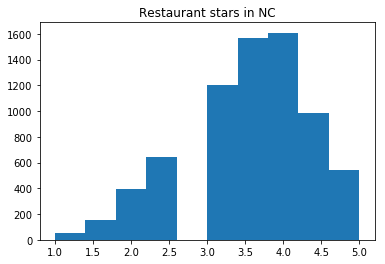

In [193]:
plt.title('Restaurant stars in NC')
plt.show()

In [196]:
plt.hist(business_info[business_info['state'] =='PA']['pricerange'])

(array([ 2163.,     0.,     0.,  3221.,     0.,     0.,   531.,     0.,
            0.,    87.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

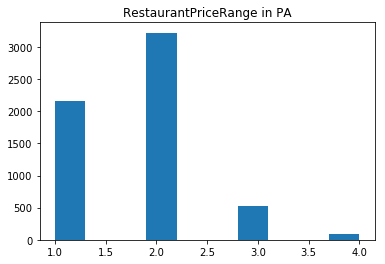

In [197]:
plt.title('RestaurantPriceRange in PA')
plt.show()

In [2]:
aaaa = pd.read_csv('business_data.csv')

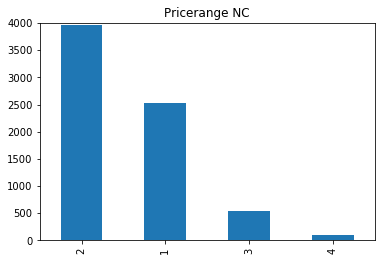

In [35]:
aaaa['pricerange'][aaaa['state']=='NC'].value_counts().plot(kind = 'bar')
plt.title('Pricerange NC')
plt.ylim([0,4000])
plt.show()

# load user data

In [172]:
data3 = []
with open('user.json') as f:
    for line in f:
        data3.append(json.loads(line))
len(data3)  

1183362

In [177]:
userid = []
average_stars= []
review_count = []
yelping_since = []

for entry in range(0, len(data3)):     
    userid.append(data3[entry]['user_id'])
    average_stars.append(data3[entry]['average_stars'])
    review_count.append(data3[entry]['review_count'])
    yelping_since.append(data3[entry]['yelping_since'])
    


In [180]:
data3 = {'user_id':userid ,'average_stars':average_stars,'review_count':review_count,'yelping_since':yelping_since,'review_count':review_count}
user_data  = pd.DataFrame(data3)

In [182]:
user_data.head(10)

,average_stars,review_count,user_id,yelping_since
0,3.80,272,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,2559,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,277,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,436,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,921,PcvbBOCOcs6_suRDH7TSTg,2012-08-16
5,5.00,22,uXjR2GhCAYhqxVr21aC4vQ,2011-10-14
6,4.40,91,N2arP_u4sMGLgOZhA6ZFoQ,2013-12-20
7,4.06,68,YHJIMK_zVH_VY6HCY6bYvg,2012-06-08
8,3.63,184,g3V76Ja0XgWS1rqx0gxL_A,2007-09-11
9,4.19,48,VTL4Dep5p7XrrOtgnXdEIQ,2010-04-25
